# CUSTOMER MARKET SEGMENTATION

In this project, I used unsupervised machine learning algorithm called K-means clustering to label customers based on their balance, transaction history as well as credit limit (to name a few).

To do so, I performed the following tasks: 

[**Task 1**](#task1): Importing the libraries and dataset

[**Task 2**](#task2): Exploring the data

[**Task 3**](#task3): Cleaning and visualising the data

[**Task 4**](#task4): Scaling the data

[**Task 5**](#task5): Choosing the optimal value of K using Elbow Method

[**Task 6**](#task6): Applying K-means clustering 

[**Task 7**](#task7): Predicting the labels

[**Task 8**](#task8):Applying Principal Component Analysis and visualize the results

<a id = 'task1'></a>
# TASK 1: Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
df = pd.read_csv('Marketing_data.csv')

<a id = 'task2'></a>
# TASK 2: Exploring the data

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
  df.shape

(8950, 18)

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
print(df['BALANCE'].mean())
print(df['BALANCE'].max())
print(df['BALANCE'].std())

1564.4748276781038
19043.13856
2081.531879456554


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
n = len(df.columns)
n

18

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Customer with maximum oneoff purchases

In [11]:
max_bal = df['ONEOFF_PURCHASES'].max()
df[df['ONEOFF_PURCHASES']==max_bal]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Customer who made the maximum cash advance

In [12]:
max_cash_trx = df['CASH_ADVANCE'].max()
cus=df[df['CASH_ADVANCE']==max_cash_trx]
cus

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<a id = 'task3'></a>
# TASK 3: Cleaning and visualising the data

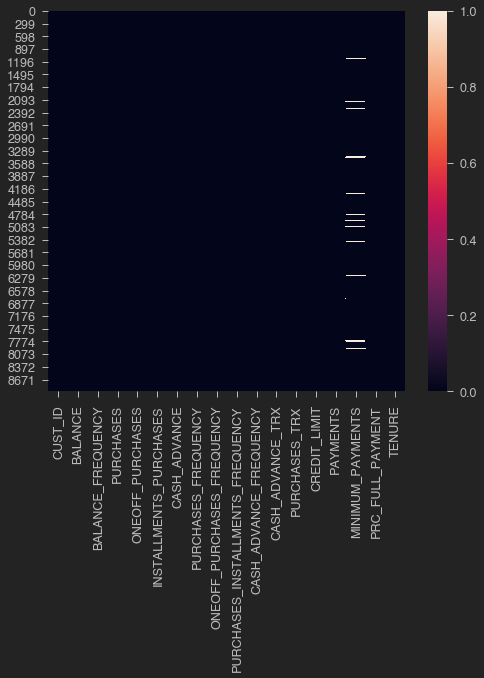

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [16]:
df.loc[(df['CREDIT_LIMIT']).isnull()==True,'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


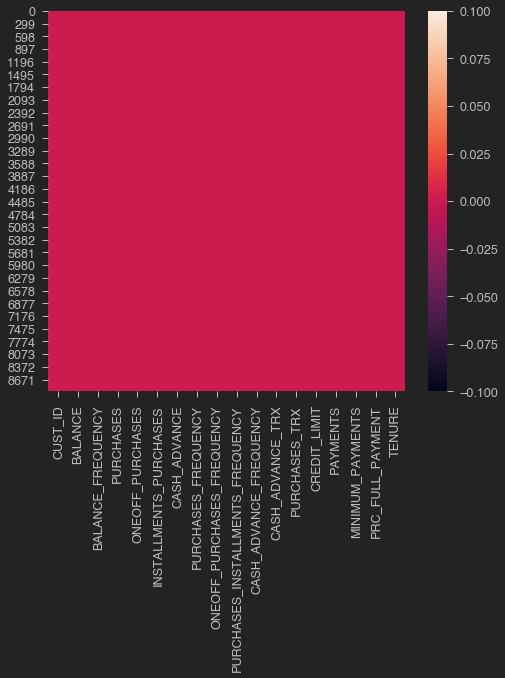

In [17]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [18]:
df.duplicated().sum()

0

Drop Customer ID column 'CUST_ID'

In [19]:
df = df.drop('CUST_ID', axis=1)

/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


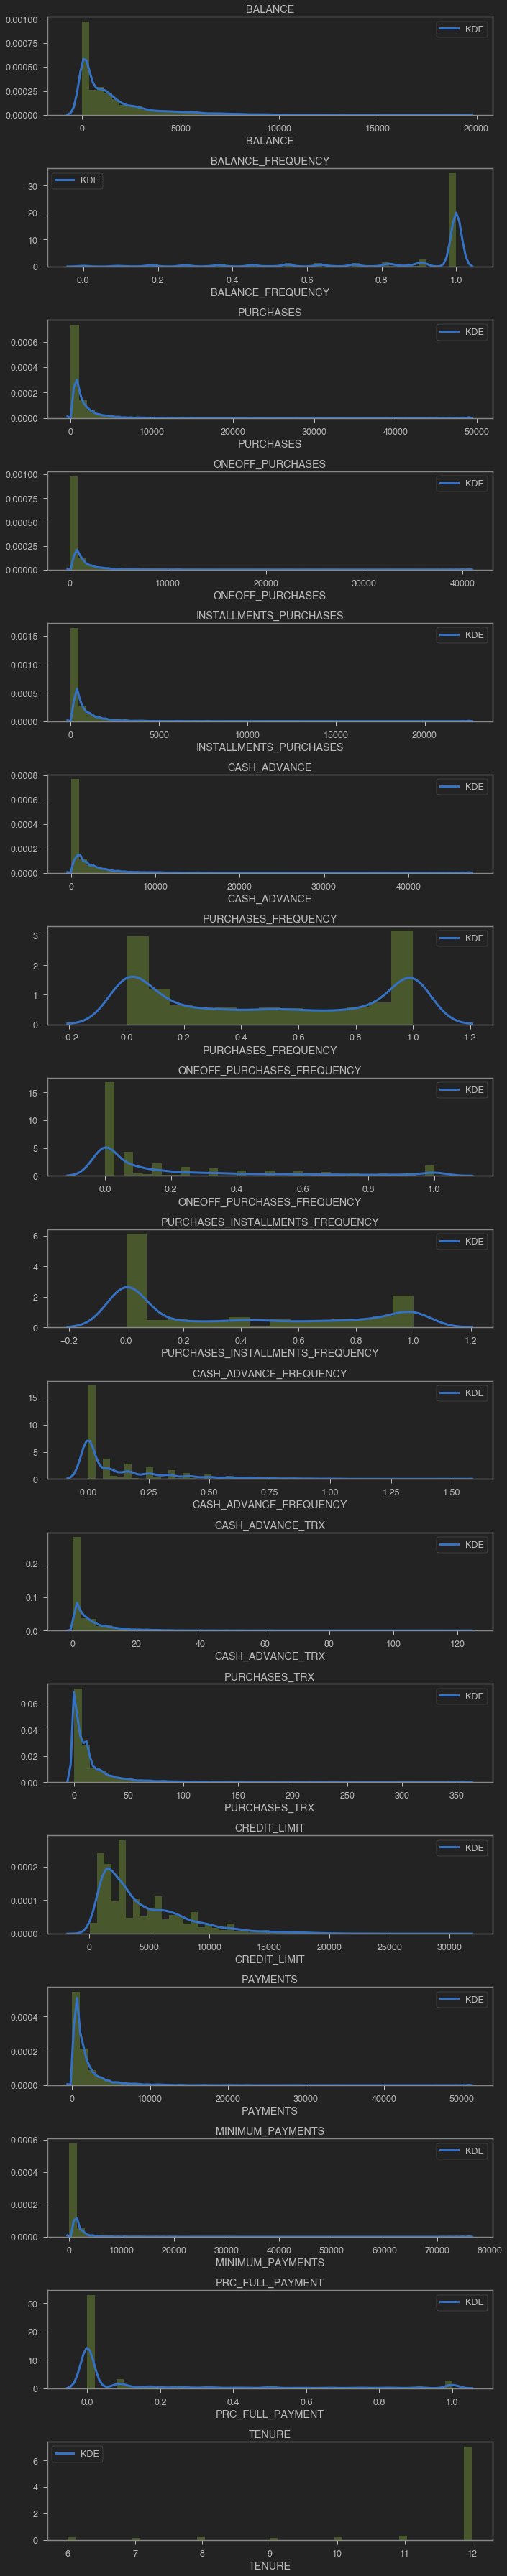

In [20]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

Correlation Matrix

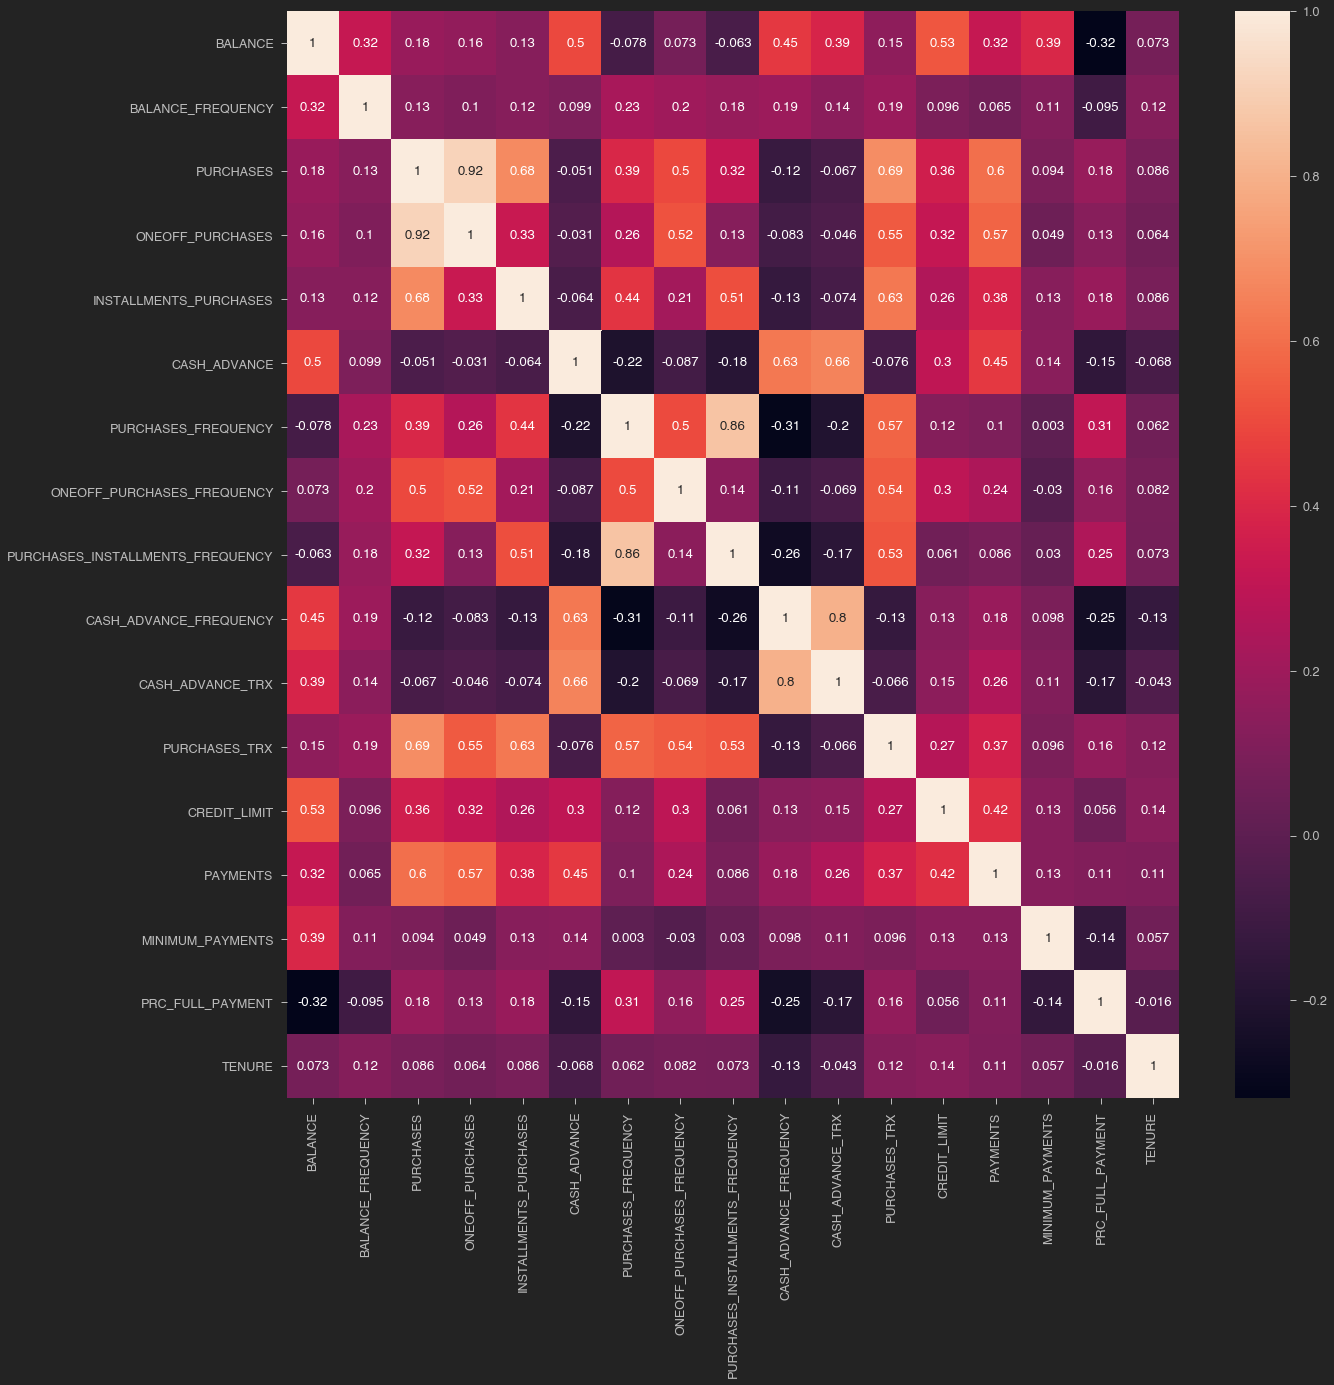

In [21]:
plt.figure(figsize=(20,20))
df.corr()
sns.heatmap(df.corr(), annot=True)
plt.show()

<a id = 'task4'></a>
# TASK 4: Scaling the data

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [23]:
df_scaled.shape

(8950, 17)

<a id = 'task5'></a>
# TASK 5: Choosing the optimal value of K using Elbow Method

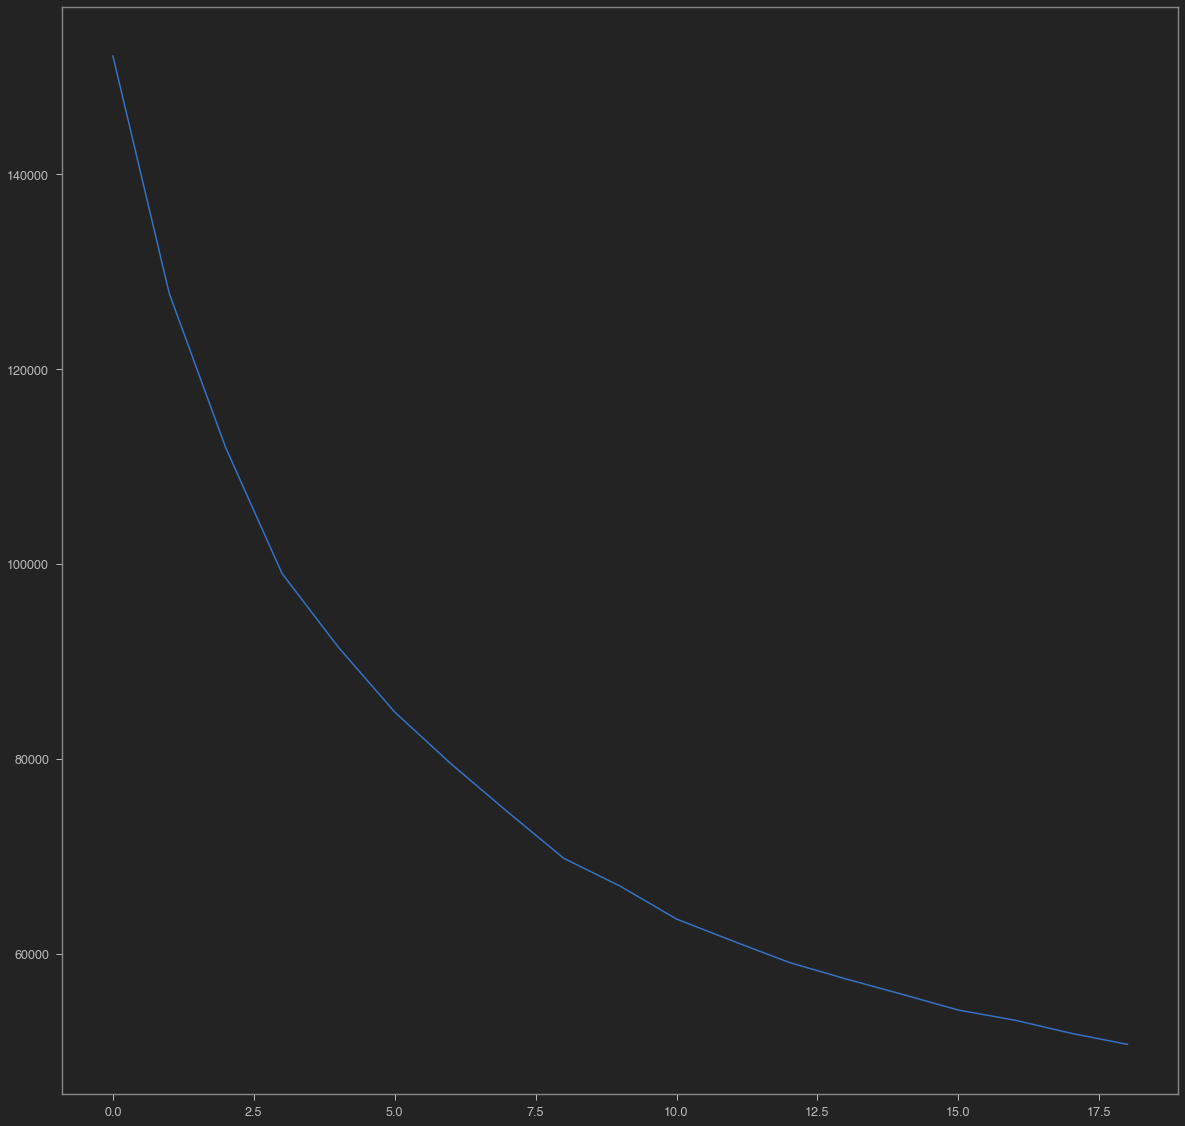

In [24]:
scores_1=[]

no_of_clusters = range(1,20)

for i in no_of_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.figure(figsize=(20,20))
plt.plot(scores_1,'bx-')

Assuming that the data only consists of the first 7 columns of "df_scaled", the optimal number of clusters would be:

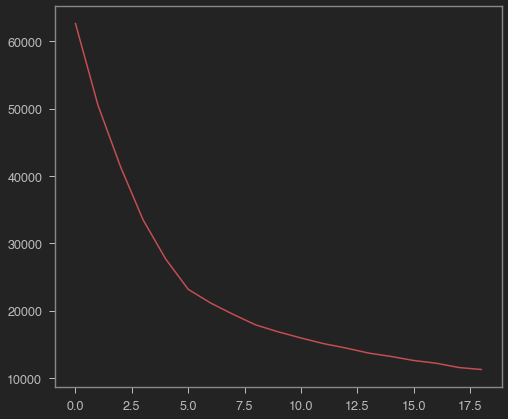

In [25]:
scores_1 = []
no_of_clusters = range(1,20)

for i in no_of_clusters:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled[:,:7])
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1,'rx-')

<a id = 'task6'></a>
# TASK 6: Applying K-means clustering

In [26]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(df_scaled)
labels=kmeans.labels_
print(labels)

[2 1 0 ... 4 2 0]


In [27]:
kmeans.cluster_centers_.shape

(7, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.154933,0.384237,0.446930,0.586226,-0.020348,-0.329144,0.921977,1.830412,0.090738,-0.390519,-0.315804,0.508328,0.361559,0.082941,-0.161549,0.369739,0.178006
1,1.634663,0.374881,-0.218413,-0.154785,-0.232140,1.992039,-0.471417,-0.207763,-0.417524,1.919708,1.887723,-0.271176,0.993073,0.775737,0.500692,-0.390429,-0.094198
2,0.000882,0.371948,-0.366005,-0.249473,-0.407003,-0.060702,-0.885953,-0.416871,-0.774640,0.167467,-0.005395,-0.494288,-0.334836,-0.264227,-0.023660,-0.455625,-0.011788
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.392033,0.311453,-0.061559,-0.254917,0.322721,-0.360848,0.977847,-0.409762,1.174532,-0.463021,-0.358373,0.140800,-0.315734,-0.243075,-0.065000,0.353652,-0.018742
5,-0.697761,-2.130789,-0.318361,-0.236870,-0.317487,-0.307198,-0.566418,-0.435009,-0.460532,-0.486820,-0.360081,-0.428364,-0.217022,-0.222993,-0.255772,0.247181,-0.153192
6,0.919142,0.468247,2.240326,1.710800,2.154205,-0.193261,1.161850,1.553529,1.245560,-0.308874,-0.210516,2.769596,1.232814,1.273021,0.567460,0.286803,0.334368


To understand these numbers, perform inverse transformation

In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1241.993892,0.968293,1958.078467,1565.453049,392.667155,288.641122,0.860384,0.748505,0.400499,0.056997,1.093697,27.344974,5809.948118,1973.250240,487.723567,0.261857,11.755537
1,4966.887116,0.966076,536.561628,335.526492,201.146251,5156.269391,0.301148,0.140478,0.198503,0.519297,16.131148,7.969399,8107.655241,3978.827695,2031.049191,0.039521,11.391257
2,1566.310979,0.965382,221.229835,178.362868,43.019928,851.576090,0.134775,0.078097,0.056576,0.168656,3.212007,2.423671,3276.180675,968.231150,809.067404,0.020452,11.501544
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,748.490489,0.951051,871.682594,169.327411,702.900059,222.156337,0.882808,0.080218,0.831226,0.042489,0.803196,18.209589,3345.679627,1029.465809,712.727047,0.257152,11.492237
5,112.144711,0.372506,323.021692,199.281869,123.968131,334.663573,0.263019,0.072686,0.181410,0.037726,0.791538,4.062308,3704.833765,1087.599537,268.141286,0.226011,11.312308
6,3477.591789,0.988194,5789.694953,3432.014930,2359.088474,573.593011,0.956657,0.665906,0.859455,0.073335,1.812207,83.551643,8979.929577,5418.414431,2186.647663,0.237599,11.964789


In [30]:
print(labels.shape)
print(labels.max())
print(labels.min())

(8950,)
6
0


<a id = 'task7'></a>
# TASK 7: Predicting the labels

In [31]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 0, 1, ..., 5, 5, 5], dtype=int32)

Concatenate the clusters labels to the original dataframe

In [32]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


Plot the histogram of various clusters

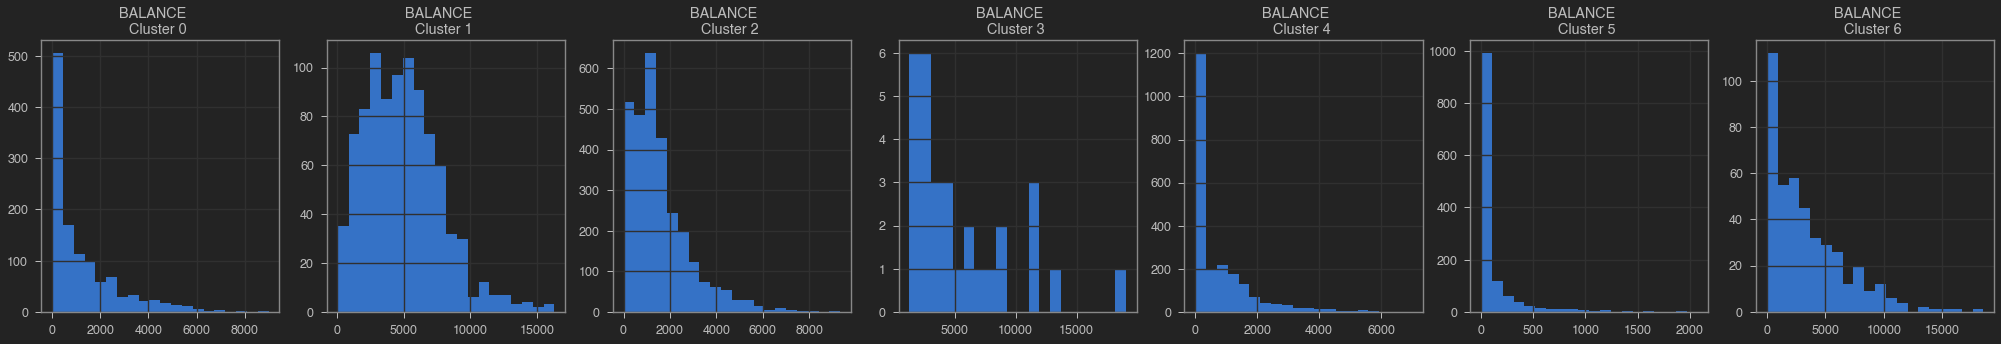

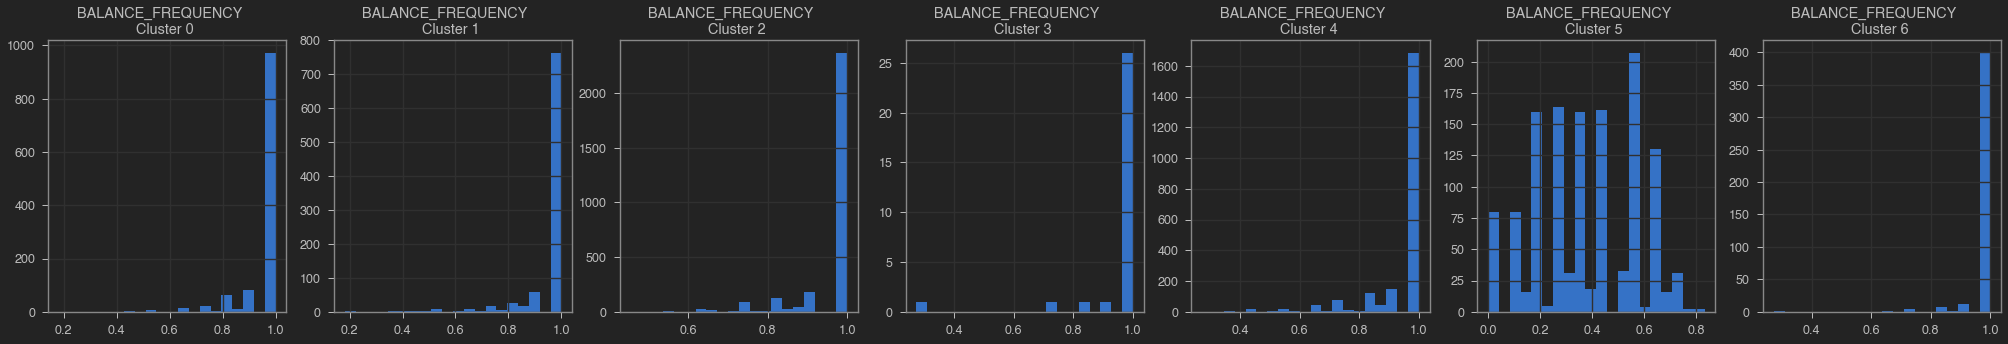

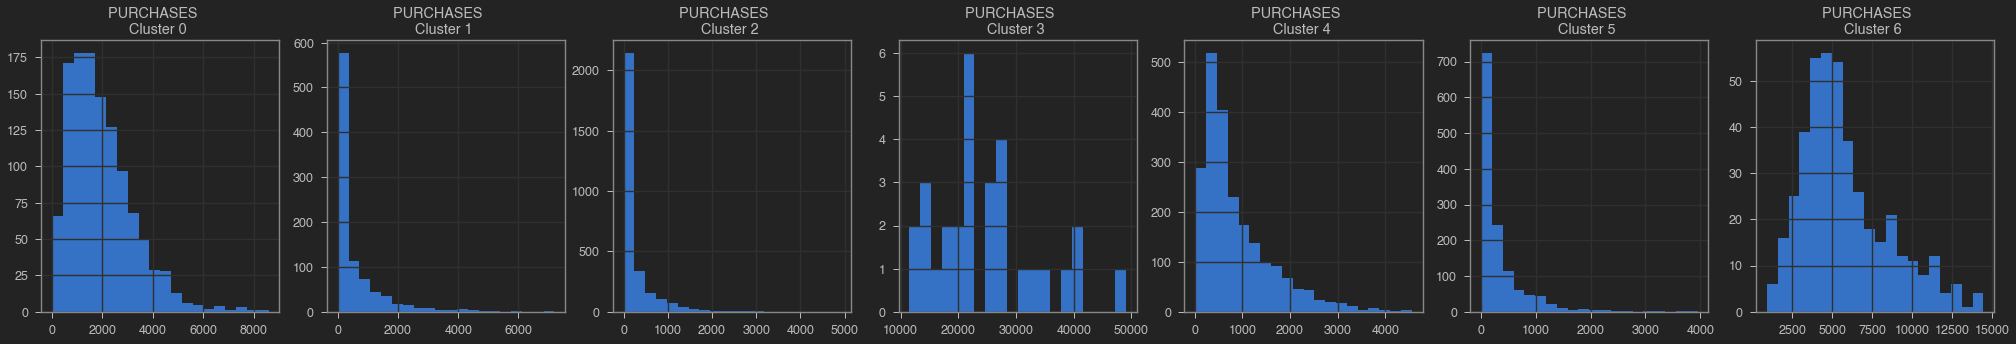

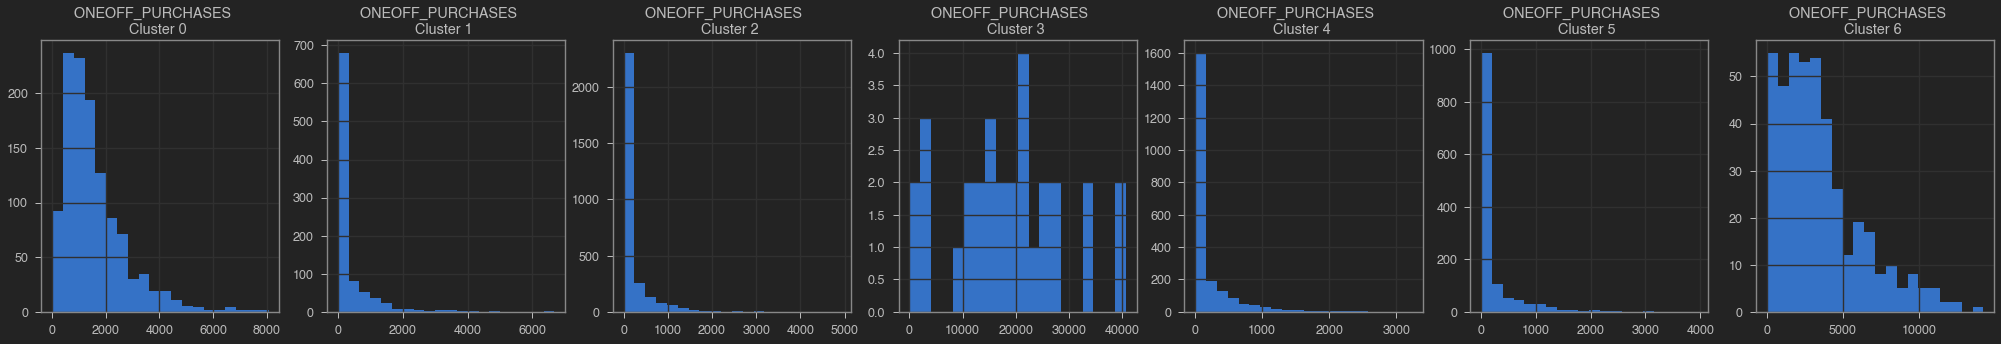

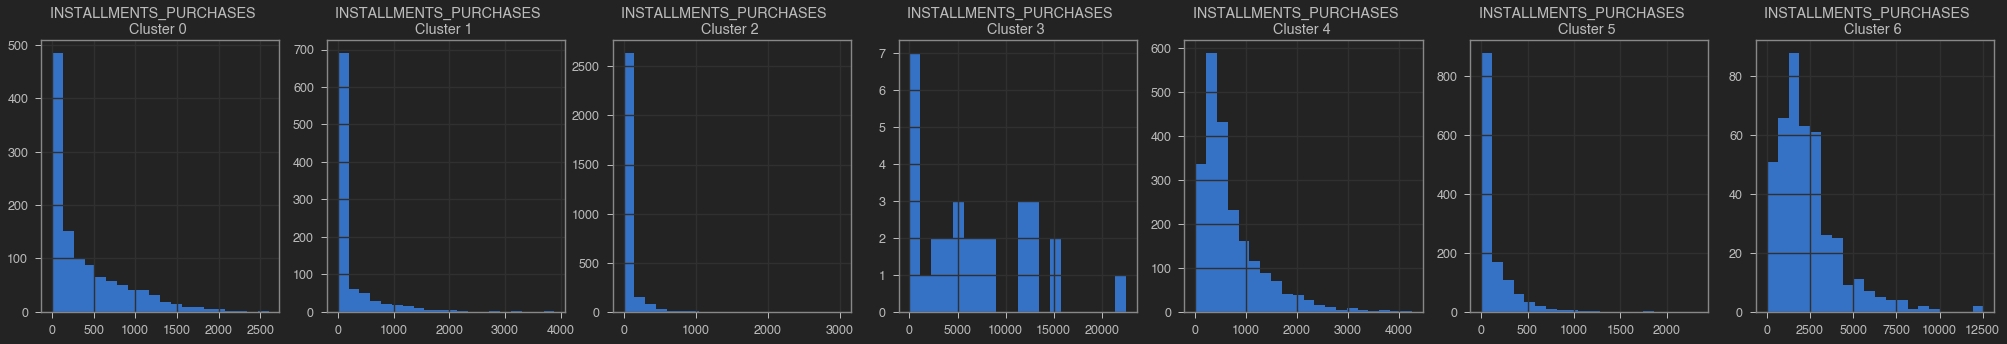

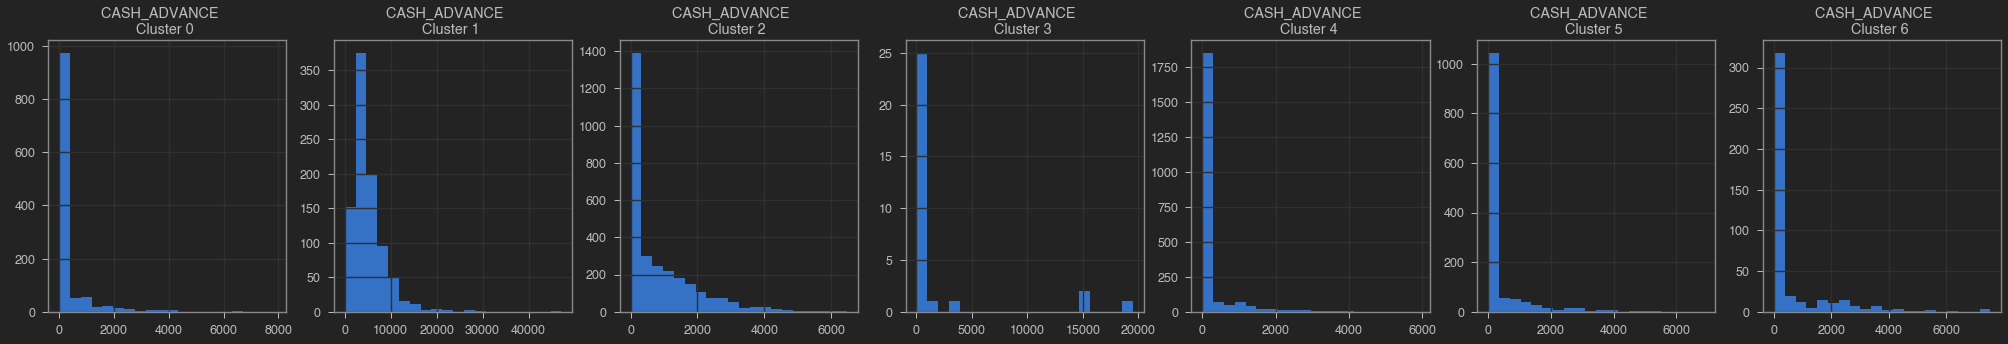

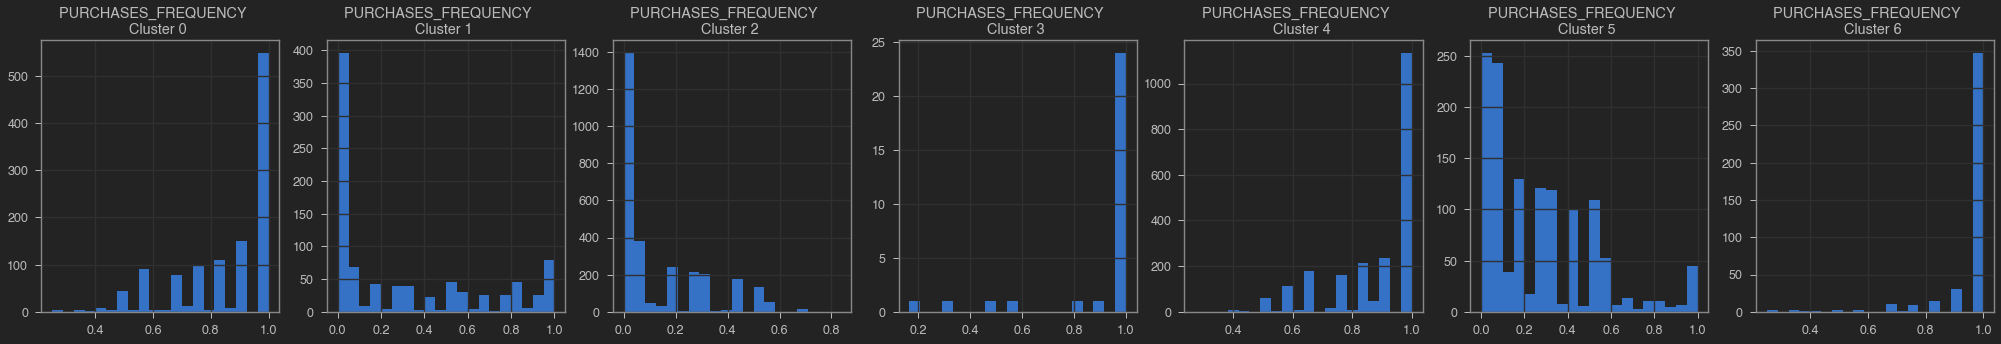

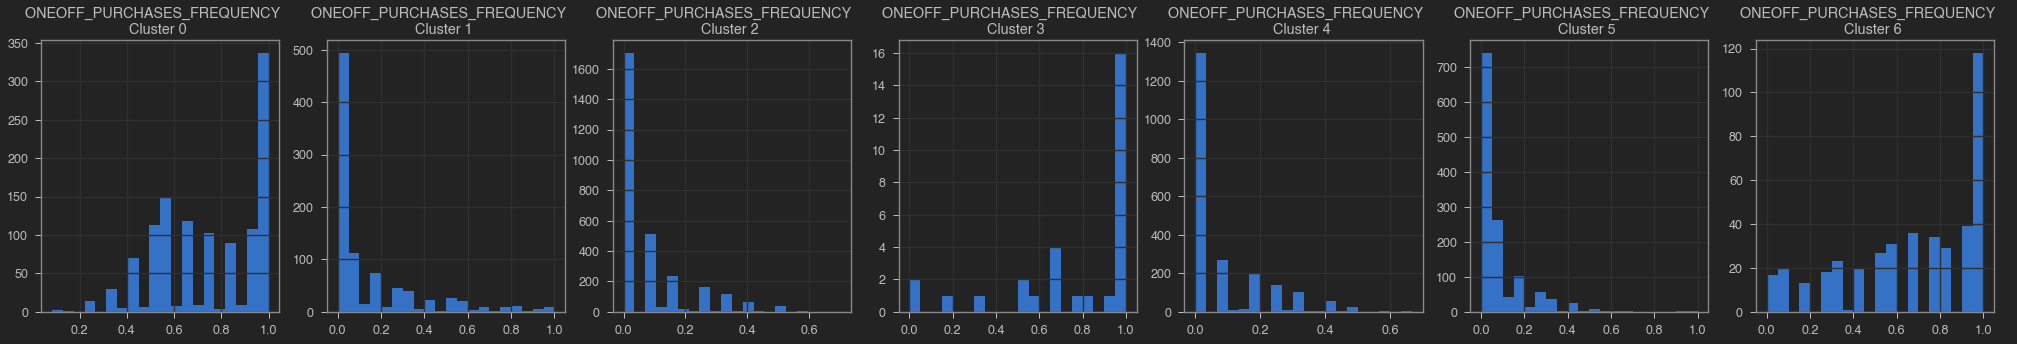

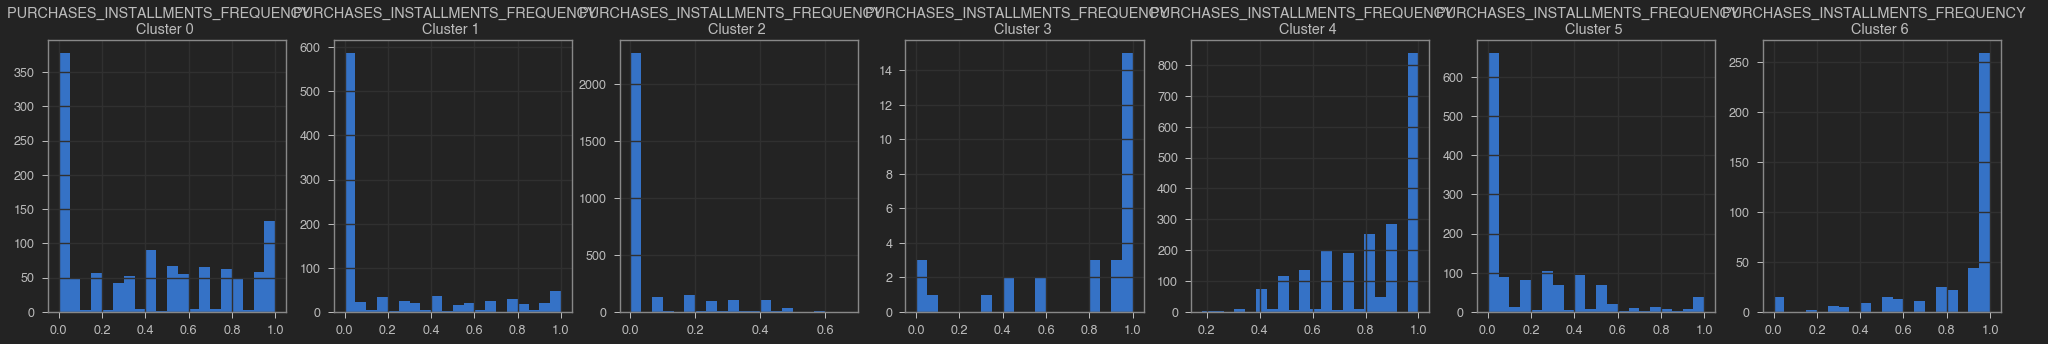

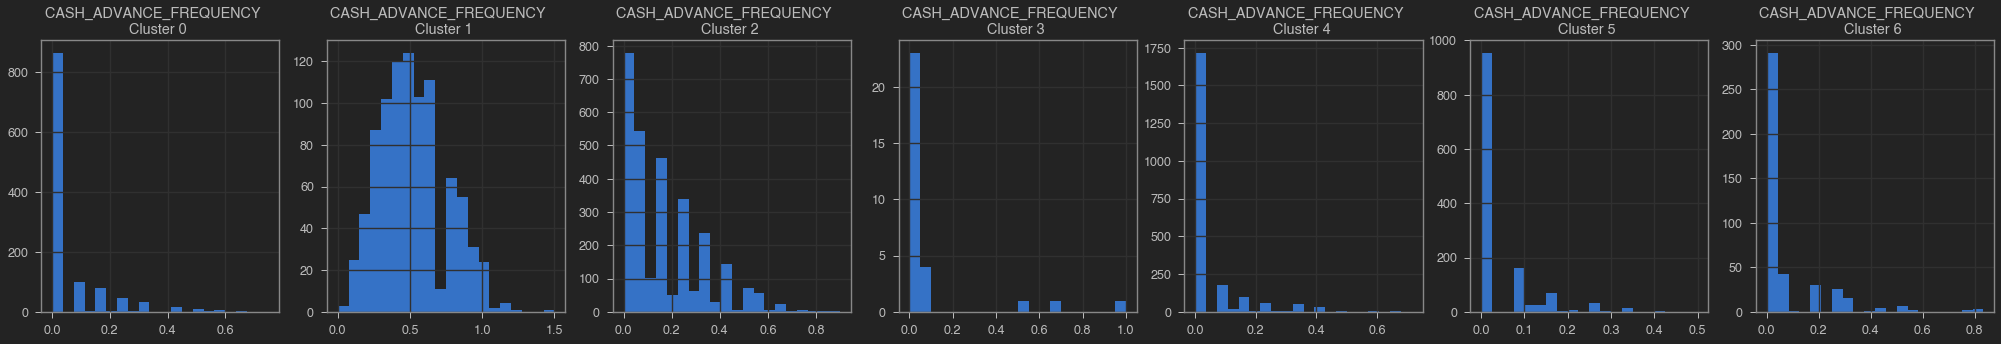

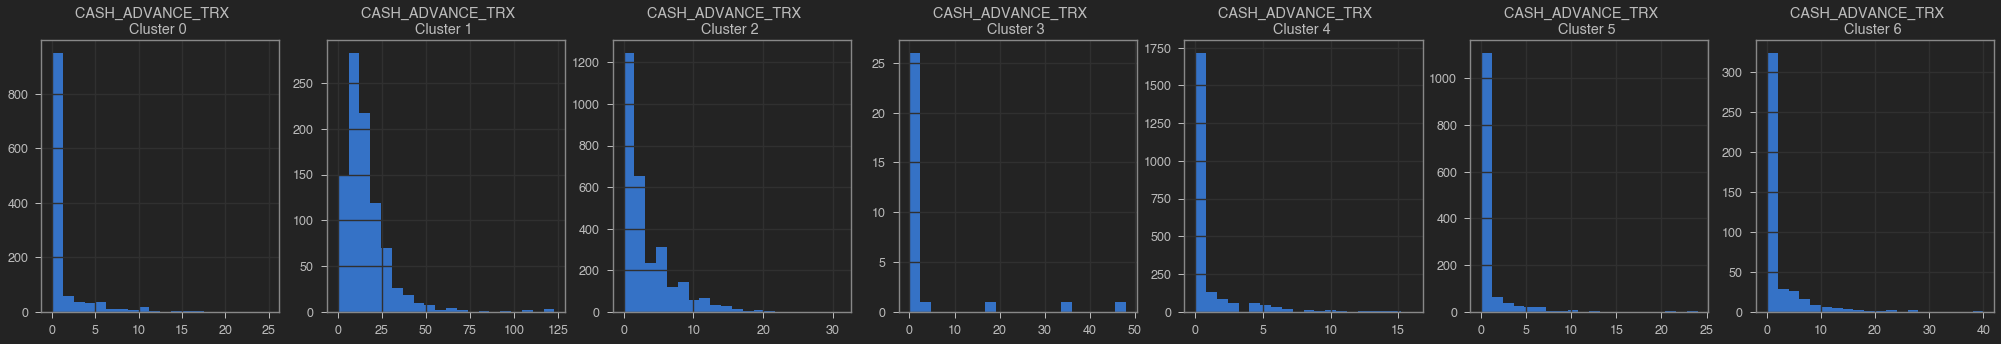

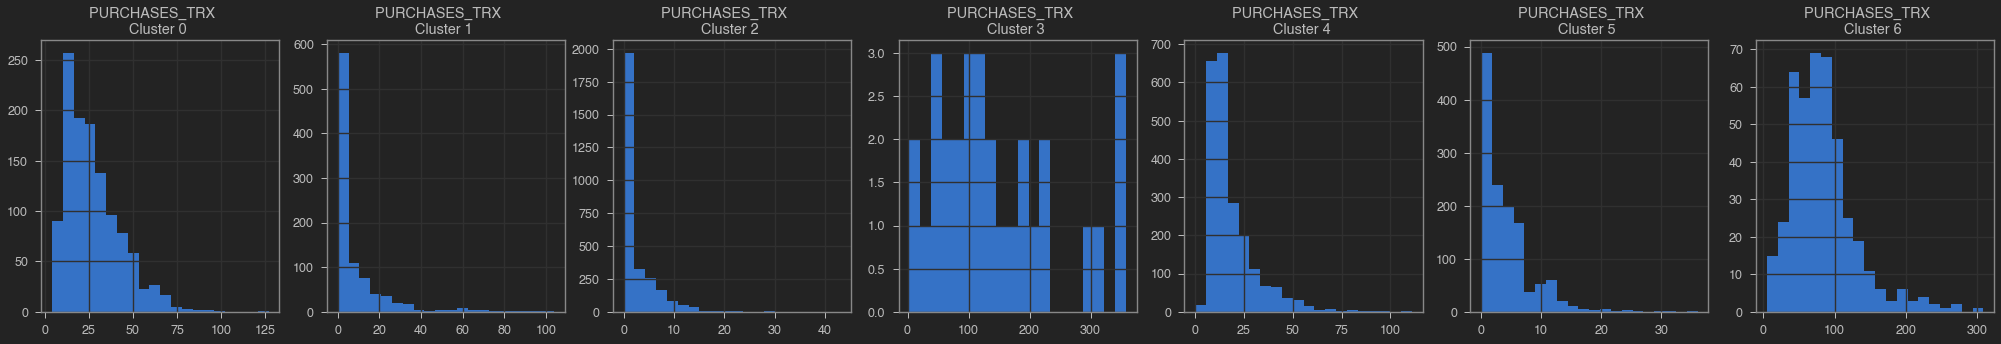

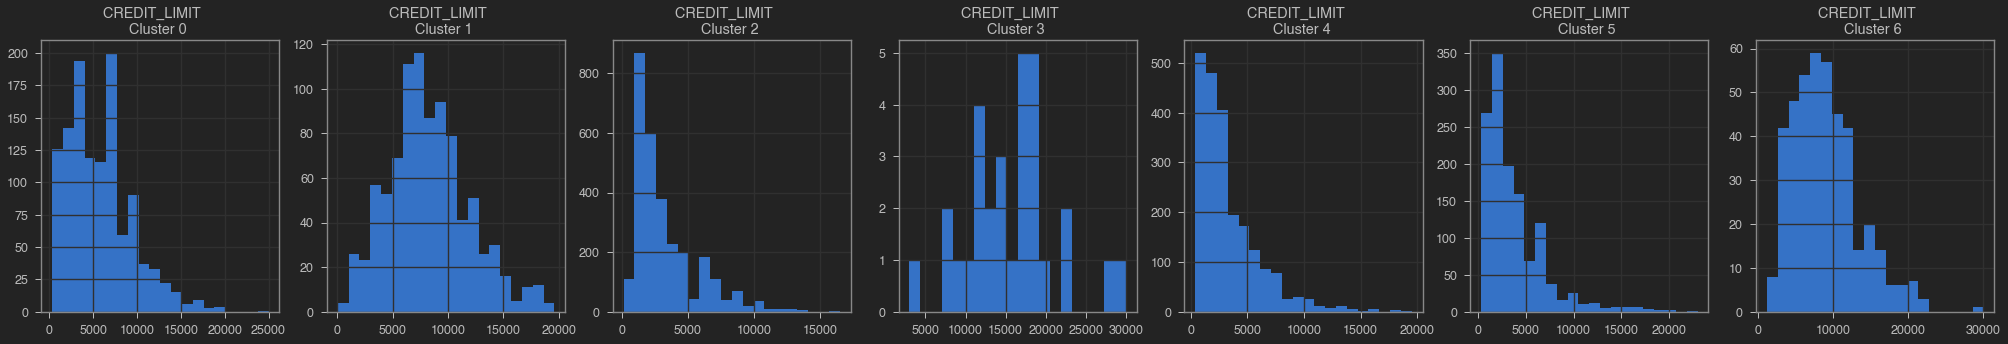

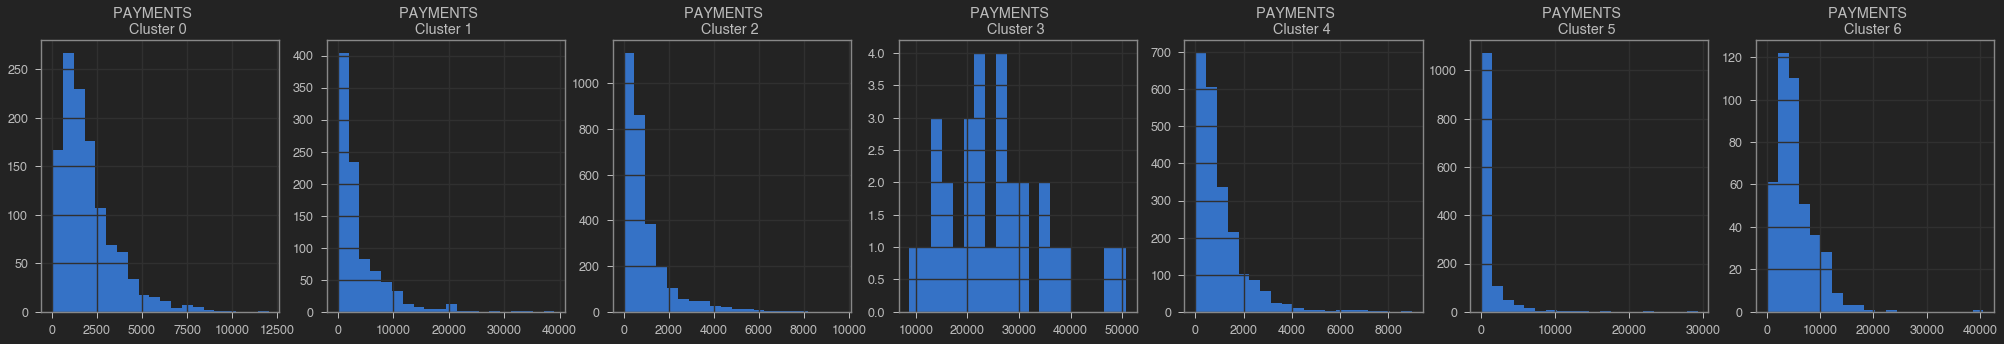

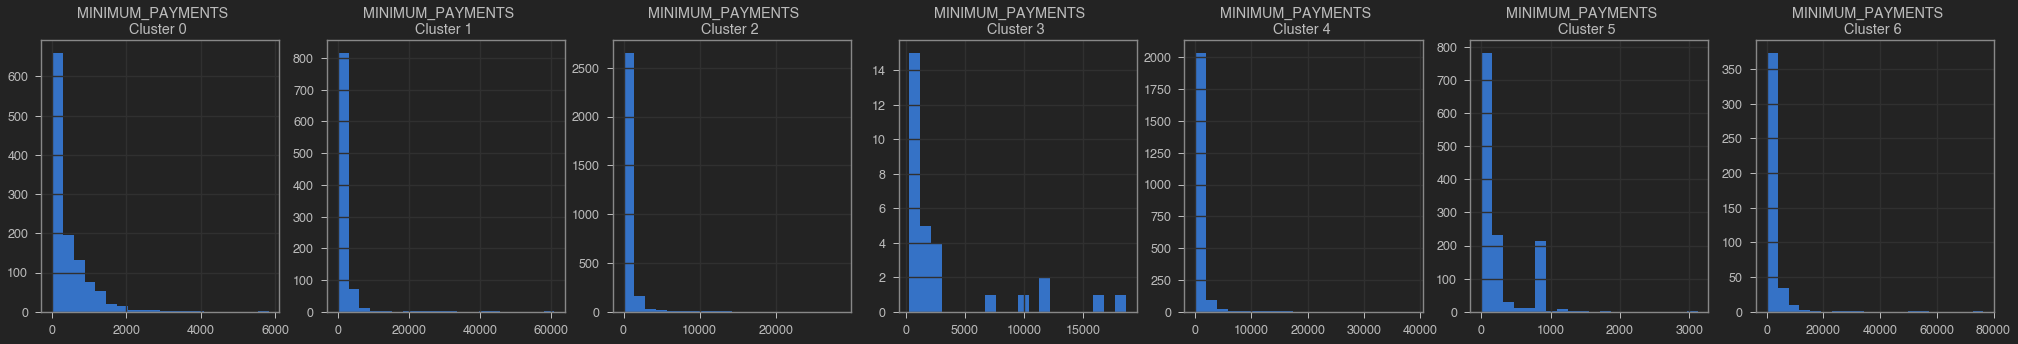

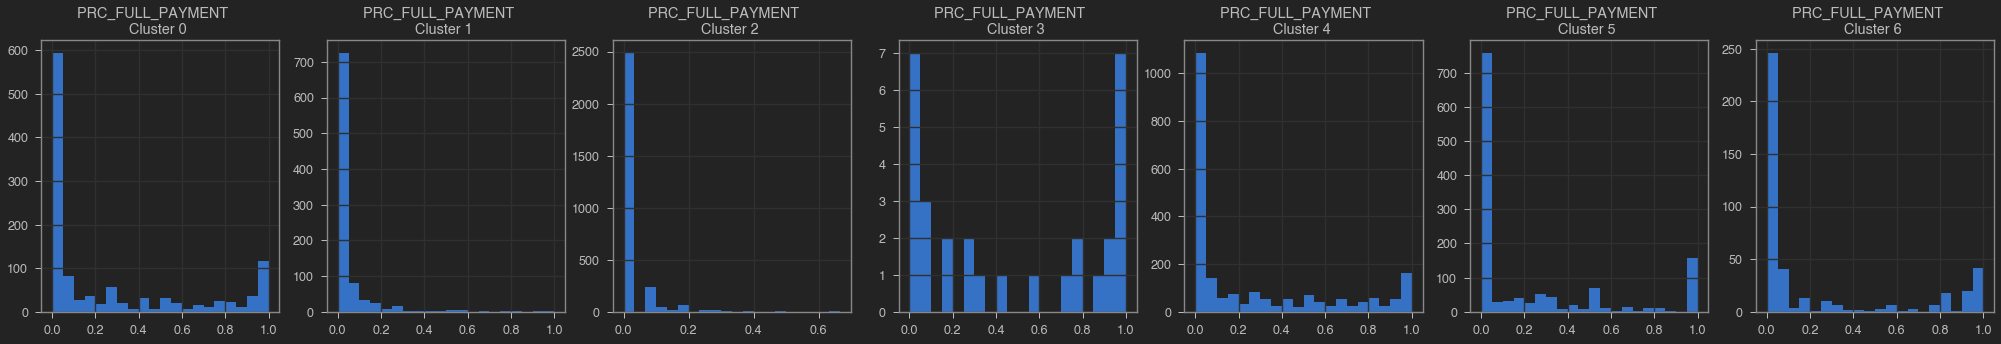

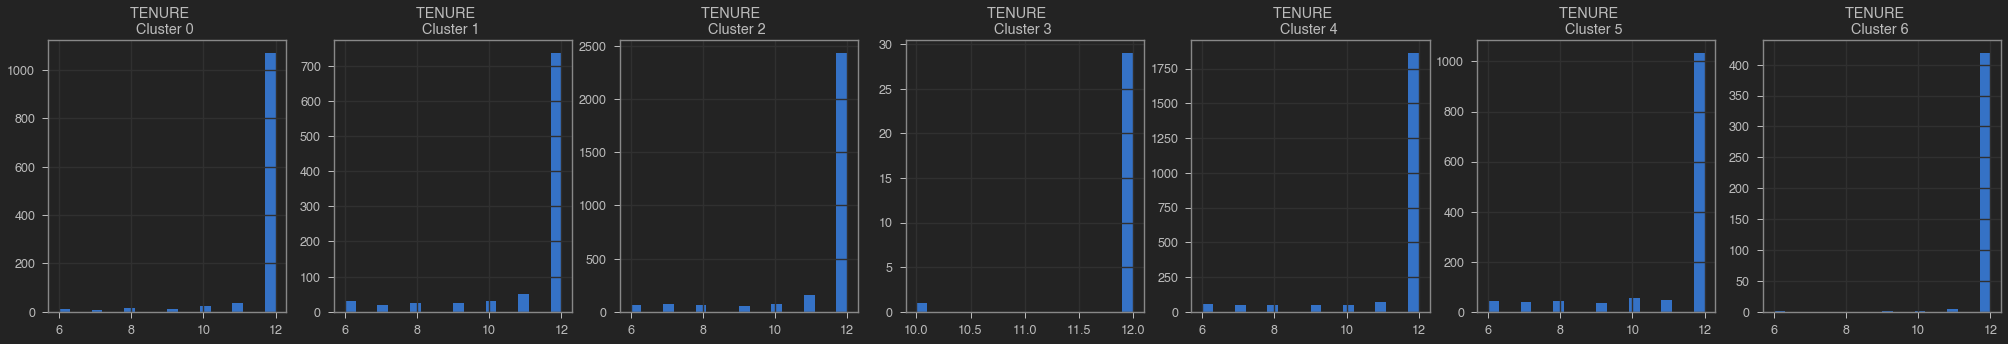

In [33]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

<a id = 'task8'></a>
# TASK 8: Applying Principal Component Analysis and visualize the results

## Applying Principal Component Analysis

In [34]:
pca = PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221906, -1.07645329],
       [-1.13828339,  2.50644956],
       [ 0.96967012, -0.38347043],
       ...,
       [-0.92620467, -1.81078688],
       [-2.33655051, -0.65797656],
       [-0.55642673, -0.40045431]])

## Visualize the results

In [35]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076453
1,-1.138283,2.506450
2,0.969670,-0.383470
3,-0.873626,0.043168
4,-1.599433,-0.688585


Concatenate the clusters labels to the dataframe

In [36]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076453,2
1,-1.138283,2.506450,1
2,0.969670,-0.383470,0
3,-0.873626,0.043168,2
4,-1.599433,-0.688585,2


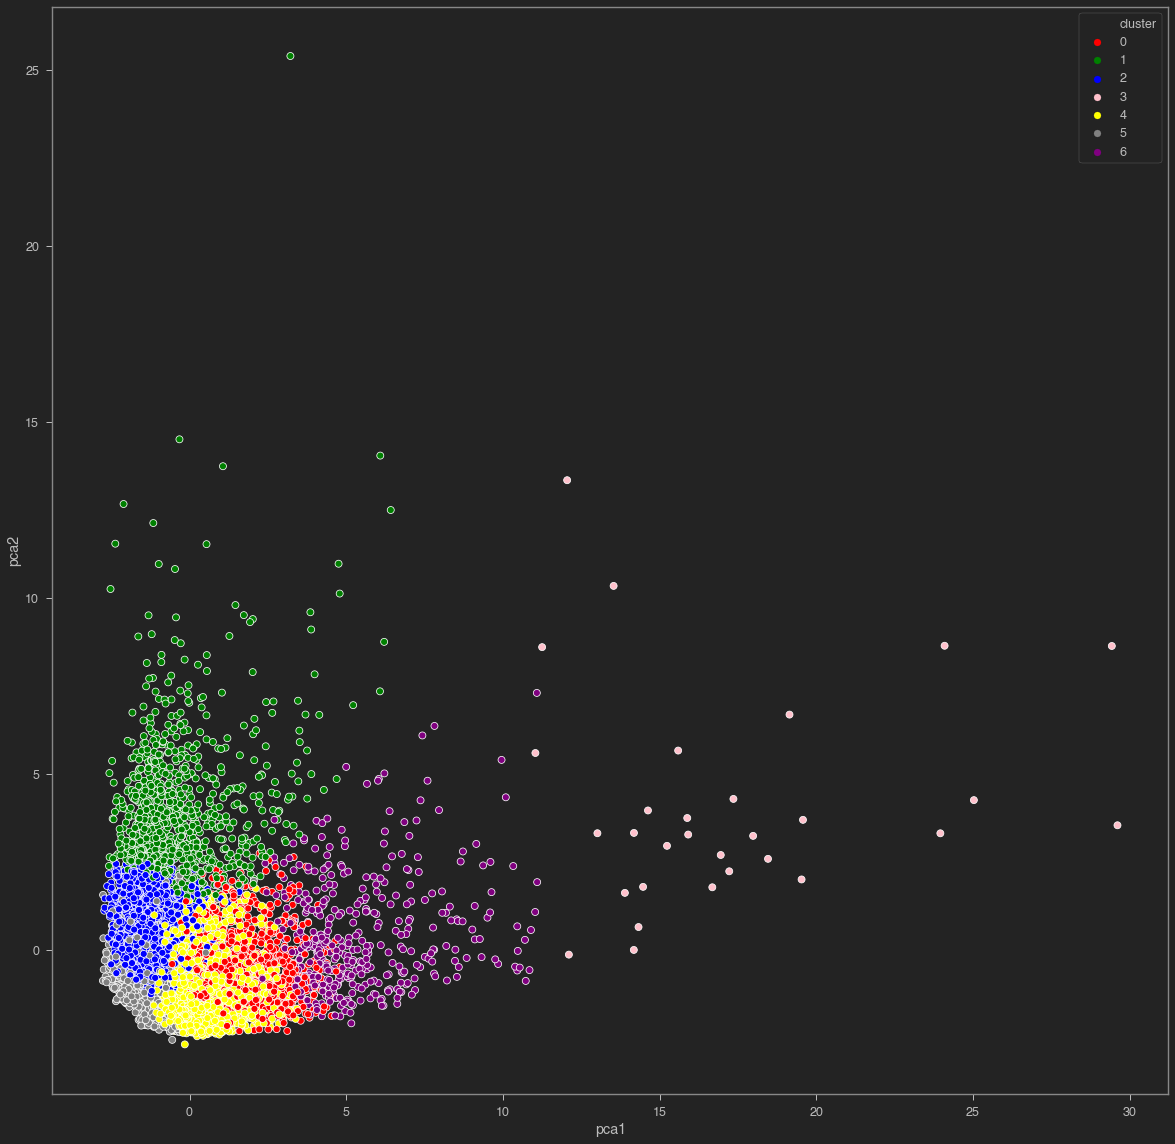

In [37]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()